In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python 3.7.13
!sudo update-alternatives --config python32

update-alternatives: priority must be an integer

Use 'update-alternatives --help' for program usage information.
update-alternatives: error: no alternatives for python32


In [ ]:
!sudo pip install python 3.7.13
!sudo pip uninstall cv2
!sudo pip uninstall opencv
!sudo apt-get remove python-opencv
!pip install opencv-python==3.4.18.65
from google.colab.patches import cv2_imshow
import cv2 as cv2
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement python (from versions: none)
ERROR: No matching distribution found for python
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package 'python-opencv' is not installed, so not removed
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58.4 MB 1.2 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66


In [132]:
import os

In [133]:
!python --version
#Python 3.7.13
cv2.__version__
#3.4.18

Python 3.7.14


'3.4.18'

In [153]:
ruta1="/content/drive/MyDrive/Procesamiento_D_Imagenes"
files_names1=os.listdir(ruta1)  #hace una lista de las clases
print(files_names1)

['Placas', 'logs', 'Model', 'Detección_Placas5_J.ipynb', 'Training', 'Test', 'VectorsTest', 'VectorsTraining']


['carro43.jpg', 'carro41.jpg', 'carro42.jpg', 'carro44.jpg', 'carro46.jpg', 'carro45.jpg', 'carro47.jpg', 'carro38.jpg', 'carro48.jpg', 'carro49.jpg', 'carro50.jpg', 'carro52.jpg', 'carro53.jpg', 'carro40_.jpg', 'Z_.png', '7_.png', '8_.png']


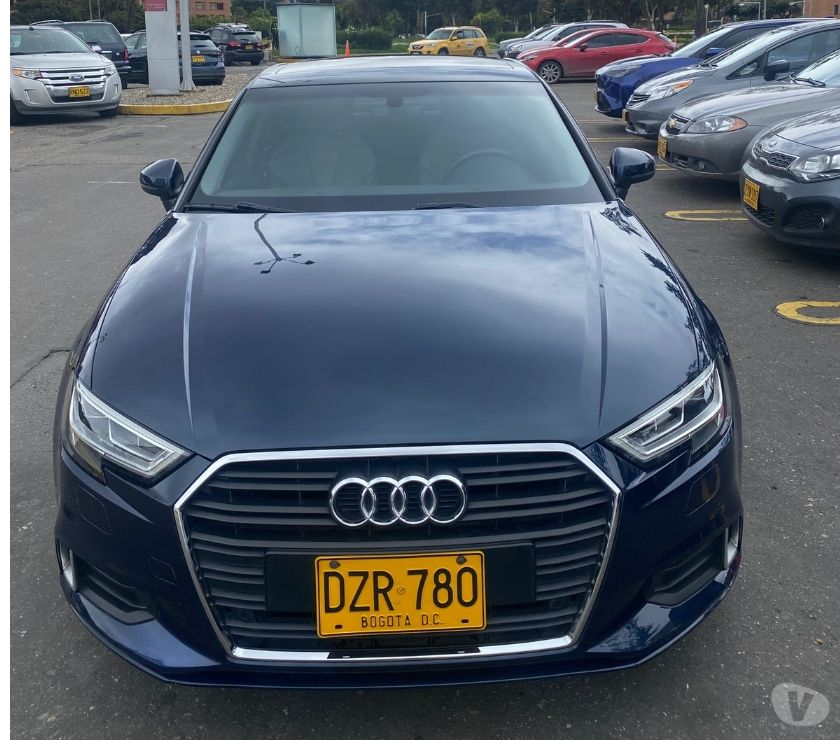

In [154]:
#file0 = cv2.imread(ruta1+ "/Placas/D1.png")
file0 = cv2.imread(ruta1+ "/Placas/carro52.jpg")
file1 = file0.copy()
#38 y 52
print(os.listdir(ruta1+"/Placas/"))  #hace una lista de las clases
cv2_imshow(file1)

1. ENTRENAR MODELO OCR:

In [ ]:
def resize_scale(img,scale_percent):
    # scale_percent contiene el porcentaje en el que se debe escalar la imagen
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized

In [ ]:
def resize_fix(img, dim):
  dsize = (dim, dim)
  # resize image
  resized = cv2.resize(img, dsize)
  return resized

*GENERAR VECTORES:*
Esta celda genera los vectores. Pero es una actividad demorada. Los vectores solo se requieren generar la primera vez.

In [ ]:
import matplotlib.pyplot as plt
# Falta estandarizar tamaño de imagen:

#Leer imágenes y conformar vectores
file2 = ruta1 +'/Img/'
files_names1=os.listdir(file2)  #List all directories in file2
vectr1= []
target1= []
etiquetas = []
etiquetasD = {} #Diccionario
num_clase1=0
contador =0
for clase in files_names1:
  ruta2=os.listdir(file2+clase) 
  contador=contador+1
  etiquetas.append([contador,clase])
  etiquetasD[contador] = [clase]
  
  for imagen in ruta2:

    aux = file2 + clase + '/' + imagen
    image= plt.imread(aux)   
    image_=resize_fix(image,64)  #redimensiona a 64x64
    if image_ is None:
      continue
    vectr1.append(image_)        #vector de vectores
    target1.append(contador)     #clasifica las imagenes de acuerdo a la clase a la que pertenecen 
  
print('vectr1',vectr1)
print('target1',target1)
print('etiquetas',etiquetas)

np.save(ruta1+'/Vectors/vectr1',vectr1)
np.save(ruta1+'/Vectors/target1',target1)


NameError: ignored

*CARGAR VECTORES Y NORMALIZAR:*

In [136]:
from sklearn.model_selection import train_test_split

#Cargo los vectores de Training
vectr1=np.load(ruta1+'/VectorsTraining/'+'vectr1.npy')
target1=np.load(ruta1+'/VectorsTraining/'+'target1.npy')
#etiquetas=np.load(ruta1+'/Vectors/'+'etiquetasD.npy')
vectr_norm=[]

#Normalizo el vector
vectr_norm = vectr1#/np.linalg.norm(255.0)


X_train2=np.array(vectr1)  #lo vuelvo un array
y_train2=np.array(target1)

#Cargo los vectores de Test
vectr2=np.load(ruta1+'/VectorsTest/'+'vectr1.npy')
target2=np.load(ruta1+'/VectorsTest/'+'target1.npy')
etiquetas2=np.load(ruta1+'/VectorsTest/'+'etiquetasD.npy','',allow_pickle=True)

dictEtiquetas = etiquetas2.tolist()

#Validación de etiqueta cargada:
print(dictEtiquetas[21])

X_test2 = np.array(vectr2)  #lo vuelvo un array
y_test2 = np.array(target2)



['K']


VALIDAR VECTORES:

In [137]:
print((y_train2[0]))

1


14


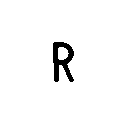

In [139]:
import matplotlib.pyplot as plt

print(y_test2[201])

#plt.imshow(X_train2[2,:])
#plt.imshow(X_test2[377,:])
cv2_imshow(X_test2[377,:])

SEPARACIÓN DE LA BASE DE DATOS:

In [140]:
#Separación de la base de datos
# X_train contiene los datos del vector de vectores, del mismo tamaño que y_train
# Y_train contiene las clases a las que pertenecen (Key)
#X_train2, X_test2, y_train2, y_test2 = train_test_split(vectr_norm, target1_norm, test_size=0.3, random_state=0)

#Finalmente la base de datos fue separada manualmente
print(X_train2.shape,y_train2.shape,X_test2.shape, y_test2.shape)
#(numero de imagenes, ancho x alto, numero de canales)


(3177, 128, 128, 3) (3177,) (464, 128, 128, 3) (464,)


RESNET:

In [ ]:
%tensorflow_version 2.x
import tensorflow.keras as k

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
def preprocess_data(x,y,num_clases):
  x_p = x
  #x_p = k.applications.resnet50.preprocess_input(x)
  y_p = k.utils.to_categorical(y, num_clases)
  return x_p, y_p

In [141]:
print((X_train2.shape, y_train2.shape))
x_train, y_train = preprocess_data(X_train2, y_train2,37)
x_test, y_test = preprocess_data(X_test2, y_test2,37)
print((x_train.shape, y_train.shape))

((3177, 128, 128, 3), (3177,))
((3177, 128, 128, 3), (3177, 37))


In [ ]:
#plt.hist(y_train2)
counts, bin_edges = np.histogram(y_train2, bins=36)
print(counts)

#plt.style.use('seaborn-white')
#plt.show()

[ 45  45  45  45  45  45  45  45  45  45 100 100 100 100 100 100 100 100
 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100 100]


In [142]:
res_model = k.applications.ResNet50(include_top=False, weights="imagenet",input_shape=(128,128,3))

In [ ]:
for i, layer in enumerate(res_model.layers):
  print(i, layer.name, "-", layer.trainable)

0 input_1 - True
1 conv1_pad - True
2 conv1_conv - True
3 conv1_bn - True
4 conv1_relu - True
5 pool1_pad - True
6 pool1_pool - True
7 conv2_block1_1_conv - True
8 conv2_block1_1_bn - True
9 conv2_block1_1_relu - True
10 conv2_block1_2_conv - True
11 conv2_block1_2_bn - True
12 conv2_block1_2_relu - True
13 conv2_block1_0_conv - True
14 conv2_block1_3_conv - True
15 conv2_block1_0_bn - True
16 conv2_block1_3_bn - True
17 conv2_block1_add - True
18 conv2_block1_out - True
19 conv2_block2_1_conv - True
20 conv2_block2_1_bn - True
21 conv2_block2_1_relu - True
22 conv2_block2_2_conv - True
23 conv2_block2_2_bn - True
24 conv2_block2_2_relu - True
25 conv2_block2_3_conv - True
26 conv2_block2_3_bn - True
27 conv2_block2_add - True
28 conv2_block2_out - True
29 conv2_block3_1_conv - True
30 conv2_block3_1_bn - True
31 conv2_block3_1_relu - True
32 conv2_block3_2_conv - True
33 conv2_block3_2_bn - True
34 conv2_block3_2_relu - True
35 conv2_block3_3_conv - True
36 conv2_block3_3_bn - True
37

In [143]:
import tensorflow as tf

to_res = (128, 128)
model = k.models.Sequential()
model.add(k.layers.Lambda(lambda image: tf.image.resize(image, to_res))) 
model.add(res_model)
model.add(k.layers.Flatten())
model.add(k.layers.BatchNormalization())
model.add(k.layers.Dense(256, activation='relu'))
model.add(k.layers.Dropout(0.5))
model.add(k.layers.BatchNormalization())
model.add(k.layers.Dense(128, activation='relu'))
model.add(k.layers.Dropout(0.5))
model.add(k.layers.BatchNormalization())
model.add(k.layers.Dense(64, activation='relu'))
model.add(k.layers.Dropout(0.5))
model.add(k.layers.BatchNormalization())
model.add(k.layers.Dense(37, activation='softmax'))

In [144]:
print(y_train[336])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [145]:
for i, layer in enumerate(model.layers):
  print(i, layer.name, "-", layer.trainable)

0 lambda_2 - True
1 resnet50 - True
2 flatten_2 - True
3 batch_normalization_8 - True
4 dense_8 - True
5 dropout_6 - True
6 batch_normalization_9 - True
7 dense_9 - True
8 dropout_7 - True
9 batch_normalization_10 - True
10 dense_10 - True
11 dropout_8 - True
12 batch_normalization_11 - True
13 dense_11 - True


In [ ]:
%ls -la "/content/drive/MyDrive/Procesamiento_D_Imagenes/"

total 1560
drwx------ 2 root root    4096 Aug 25 02:06 7/
-rw------- 1 root root 1572077 Sep  8 20:55 Detección_Placas5_J.ipynb
drwx------ 2 root root    4096 Aug 28 21:42 Img/
drwx------ 2 root root    4096 Aug 28 22:50 logs/
drwx------ 2 root root    4096 Sep  6 01:36 Model/
drwx------ 2 root root    4096 Aug 25 02:06 Placas/
drwx------ 2 root root    4096 Aug 28 22:21 Vectors/


In [ ]:
!chmod 777 "/content/drive/MyDrive/Procesamiento_D_Imagenes/Model/"

In [ ]:
def make_model():
  res_model = k.applications.ResNet50(include_top=False, weights="imagenet",input_shape=(128,128,3))
  to_res = (128, 128)
  model = k.models.Sequential()
  model.add(k.layers.Lambda(lambda image: tf.image.resize(image, to_res))) 
  model.add(res_model)
  model.add(k.layers.Flatten())
  model.add(k.layers.BatchNormalization())
  model.add(k.layers.Dense(256, activation='relu'))
  model.add(k.layers.Dropout(0.5))
  model.add(k.layers.BatchNormalization())
  model.add(k.layers.Dense(128, activation='relu'))
  model.add(k.layers.Dropout(0.5))
  model.add(k.layers.BatchNormalization())
  model.add(k.layers.Dense(64, activation='relu'))
  model.add(k.layers.Dropout(0.5))
  model.add(k.layers.BatchNormalization())
  model.add(k.layers.Dense(37, activation='softmax'))
  return model


In [146]:
from tensorflow.python.keras.models import load_model
file_path="/content/drive/MyDrive/Procesamiento_D_Imagenes/Model/"


model = tf.keras.models.load_model('/content/drive/MyDrive/Procesamiento_D_Imagenes/Model/Model_Resnet50_corales.h5')


OSError: ignored

In [147]:
#Definición del Chek_Point:
check_point = k.callbacks.ModelCheckpoint(filepath=file_path+"Model_Resnet50_corales.h5",monitor="val_accuracy",mode="max",save_best_only=True,)

In [148]:
#Compilación del modelo:
model.compile(loss='categorical_crossentropy',optimizer=k.optimizers.RMSprop(lr=2e-5),metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [149]:
#Entrenamiento del Modelo:
history = model.fit(x_train, y_train, batch_size=256, epochs=100000, verbose=1,validation_data=(x_test, y_test),callbacks=[check_point])

Epoch 1/100000
13/13 [==============================] - 25s 1s/step - loss: 4.1127 - accuracy: 0.0280 - val_loss: 3.8834 - val_accuracy: 0.0129
Epoch 2/100000
13/13 [==============================] - 12s 935ms/step - loss: 3.9447 - accuracy: 0.0444 - val_loss: 3.7147 - val_accuracy: 0.0280
Epoch 3/100000
13/13 [==============================] - 12s 934ms/step - loss: 3.8337 - accuracy: 0.0526 - val_loss: 3.6587 - val_accuracy: 0.0539
Epoch 4/100000
13/13 [==============================] - 11s 812ms/step - loss: 3.7369 - accuracy: 0.0633 - val_loss: 3.5831 - val_accuracy: 0.0539
Epoch 5/100000
13/13 [==============================] - 11s 821ms/step - loss: 3.6596 - accuracy: 0.0724 - val_loss: 3.5323 - val_accuracy: 0.0496
Epoch 6/100000
13/13 [==============================] - 11s 810ms/step - loss: 3.6346 - accuracy: 0.0711 - val_loss: 3.5211 - val_accuracy: 0.0474
Epoch 7/100000
13/13 [==============================] - 11s 814ms/step - loss: 3.5051 - accuracy: 0.0872 - val_loss: 3.47

KeyboardInterrupt: ignored

PREDICCIÓN:

PREDECIR UN VALOR:

128
128


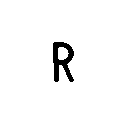

(128, 128, 3)
Indice Predicción: [28]
Valor Predicho:  ['R']


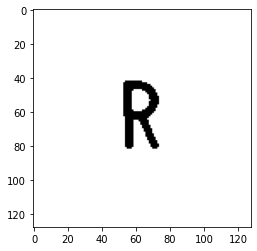

In [152]:
s = (128,128)
imagenBlanca = np.ones(s, dtype=np.uint8)*255
plt.imshow(X_test2[377,:])

img1 = cv2.cvtColor(X_test2[377,:], cv2.COLOR_BGR2GRAY) #New
#gray1 = cv2.cvtColor(X_test2[250,:], cv2.COLOR_BGR2GRAY)
#gray2,file1= cv2.threshold(gray1,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
h,w= img1.shape[:2]
print(h)
print(w)
h_img, w_img = imagenBlanca.shape[:2]

center_x = int(w_img/2)
center_y = int(h_img/2)

top_y = center_y - int(h/2)
left_x = center_x - int(w/2)
bottom_y = top_y + h
right_x = left_x + w

roi = imagenBlanca[top_y:bottom_y, left_x:right_x]
result = cv2.addWeighted(img1, 1, w, 0, 0)
imagenBlanca[top_y:bottom_y, left_x:right_x] = result

imagenBlanca = cv2.cvtColor(imagenBlanca, cv2.COLOR_GRAY2RGB)
cv2_imshow(imagenBlanca)
print(imagenBlanca.shape)
indicePrediccion = (model.predict( np.array( [imagenBlanca,] )  )).argmax(axis=1)
print('Indice Predicción:', indicePrediccion)
print('Valor Predicho: ',dictEtiquetas[int(indicePrediccion)])


128


KeyboardInterrupt: ignored

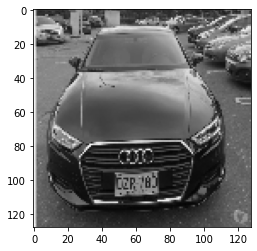

In [ ]:
#print((X_test2[200,:]).shape)
#imagen = X_test2[273,:] #O
#imagen = X_test2[305,:] #R
#imagen = X_test2[388,:] #Z
#imagen = X_test2[103,:] #9
#imagen = X_test2[90,:]  #8
#imagen = X_test2[79,:]  #7
imagen = X_test2[320,:]
#imagen = file1
gray1 = cv2.cvtColor(file0, cv2.COLOR_BGR2GRAY)
#gray2,thresh1= cv2.threshold(gray1,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

#cv2_imshow(thresh1)
imagenAPredecir = cv2.cvtColor(gray1, cv2.COLOR_GRAY2RGB)
dsize = (128,128)
imagenAPredecir = cv2.resize(imagenAPredecir,dsize)
plt.imshow(imagenAPredecir)
print(len(imagenAPredecir))
indicePrediccion = (model.predict( np.array( [imagenAPredecir,] )  )).argmax(axis=1)
print('Indice Predicción:', indicePrediccion)
print('Valor Predicho: ',dictEtiquetas[int(indicePrediccion)])




In [ ]:
#from local.lib import mlutils

test_preds2 = model.predict(X_test2).argmax(axis=1)
#mlutils.plot_confusion_matrix(y_test2, test_preds2, classes=np.r_[0,1,2,3,4], normalize=True)
print('test_preds2',test_preds2)
print('test_Real2',y_test2)

test_preds2 [ 1  1 25  1  1  1  1  1  1  1  1  1  2  2  2  2 22  2  2  2  2  2  3  3
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7
  7  7  7  7  7  7  8  8  8  8  8  8  8  8 30  8  8  8  9  9  9  9  9  9
  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11
 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13
 13 14 14 14 14 14 14 14 14 14 14 14 15 15 15 15 13 15 15 15 15 15 15 16
 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17 18 18 18
 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20 20 20 20 20 20
 20 20 20 21 21 21 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22 22 22
 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 31 24 24 25 25
 25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 27 27 27 27
 27 27 27 27 27 27 28 28 28 20 28 24 28 28 28 18 28 28 29 29 29 29 29 29
 29 29 29 29 29 30 30 30 30 30 30 30 30

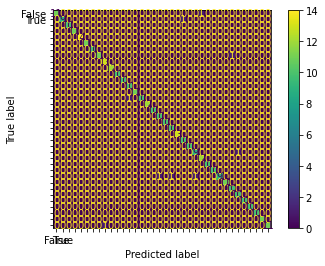

In [ ]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test2, test_preds2) 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True]) 
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

# Print the confusion matrix
print(metrics.confusion_matrix(y_test2, test_preds2))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test2, test_preds2, digits=37))

[[11  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0 11  0]
 [ 0  0  0 ...  0  0 11]]
                                       precision    recall  f1-score   support

                                    1  1.0000000000000000000000000000000000000 0.9166666666666666296592325124947819859 0.9565217391304348115710354250040836632        12
                                    2  1.0000000000000000000000000000000000000 0.9000000000000000222044604925031308085 0.9473684210526316373801591907977126539        10
                                    3  1.0000000000000000000000000000000000000 1.0000000000000000000000000000000000000 1.0000000000000000000000000000000000000        10
                                    4  1.0000000000000000000000000000000000000 1.0000000000000000000000000000000000000 1.0000000000000000000000000000000000000        11
                                    5  1.0000000000000000000000000000000000000 1.0000000

PARTE 1:

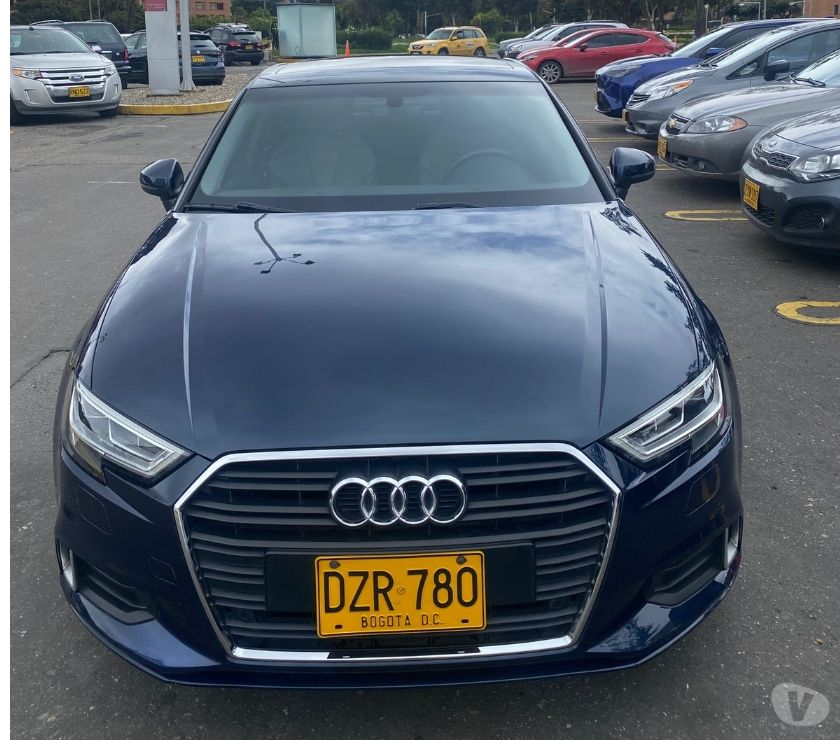

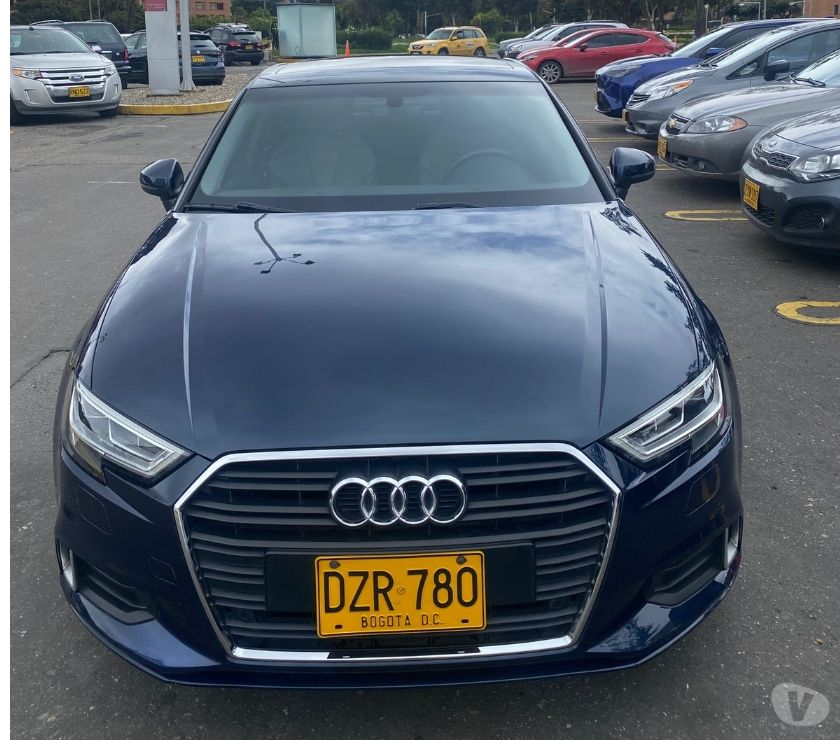

color:


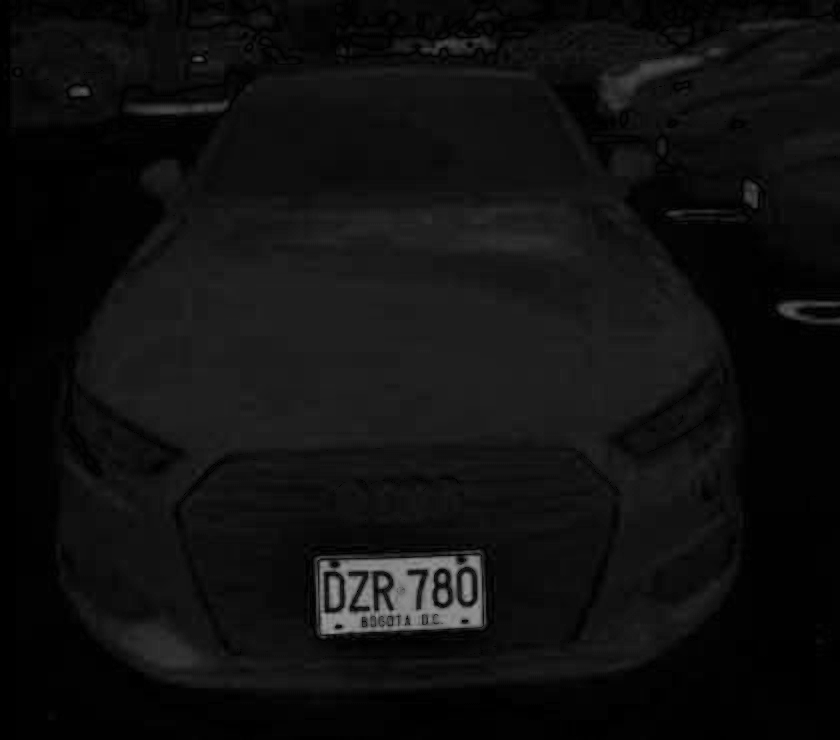

area: 44.0
area: 14.5
area: 2.0
area: 42.5
area: 5.0
area: 8.5
area: 2.0
area: 68.0
area: 8.0
area: 79.0
area: 58.0
area: 61.5
area: 2.0
area: 72.5
area: 49.5
area: 37.0
area: 7.5
area: 2.0
area: 98.0
area: 4.0
area: 264.5
area: 77.5
area: 5.0
area: 35.0
area: 233.0
area: 697.0
area: 480.0
area: 885.0
area= 885.0
aspect_ratio: 0.5434782608695652
area: 380.5
area: 743.5
area: 830.5
area= 830.5
aspect_ratio: 0.5581395348837209
area: 0.0
area: 11169.5
area= 11169.5
aspect_ratio: 2.076923076923077
placa:


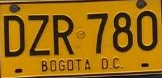

placa SIZE: (78, 162, 3)
area: 7.5
area: 0.0
area: 3.5
area: 2.0
SIZE_contornos:  (37,)
SIZE_candidatos:  (1, 78, 1, 2)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [155]:
#Preprocesado de Imagen:
# Reduce Brighness
cv2_imshow(file1)
#plt.imshow(file1[:,:])
#plt.imshow(file1)

h, s, v = cv2.split(file1)
v = cv2.subtract(v, 50)
v[v < 0] = 0
hsv = cv2.merge((h, s, v))

img_np = np.array(hsv)

#Identificar amarillas:
img_np = file1
cv2_imshow(img_np)
nB = np.matrix(img_np[:,:,0])
nG = np.matrix(img_np[:,:,1])
nR = np.matrix(img_np[:,:,2])

color = cv2.absdiff(nG,nB) #Restar
#_,umbral = cv2.threshold(color,40,255,cv2.THRESH_BINARY) #Binariza la imagen 38
#_,umbral = cv2.threshold(color,100,255,cv2.THRESH_BINARY) #Binariza la imagen 47

#Binarización adaptativa:
imgSize = np.shape(color)
blockSize = int(1 / 8 * imgSize[0] / 2 * 2 + 1)
if blockSize <= 1:
  blockSize = int(imgSize[0] / 2 * 2 + 1)
const = 10
mask = cv2.adaptiveThreshold(color, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
#mask = cv2.adaptiveThreshold(color, maxValue = 255, adaptiveMethod = cv2.ADAPTIVE_THRESH_MEAN_C, thresholdType = cv2.THRESH_BINARY, blockSize = blockSize, C = const)

#Operación Morfológica para definir bien el contorno de la máscara
kernel = np.ones((5, 5), np.uint8)
mask = cv2.dilate(mask, kernel, iterations=1)
#mask = cv2.dilate(mask, kernel, iterations=1)
#mask = cv2.erode(mask, kernel, iterations=1)
#img_erosion = cv2.erode(img_erosion, kernel, iterations=1)





print('color:')
cv2_imshow(color)
#print('mask:')
#cv2_imshow(mask)
#cv2_imshow(canvas)

[fil,col] = color.shape
for i in range(0,fil):
  for j in range(0,col):
    if color[i,j]<80:
      color[i,j]=0

for i in range(0,fil):
  for j in range(0,col):
    if color[i,j]>0:
      color[i,j]=1

color = color *255
#print('color Segmentado:')
#cv2_imshow(color)

im2,contornos,hierarchy = cv2.findContours(color,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

candidatos = []
for c in contornos:
  area = cv2.contourArea(c)
  x,y,w,h = cv2.boundingRect(c)
  epsilon = 0.09*cv2.arcLength(c,True)
  approx = cv2.approxPolyDP(c,epsilon,True)   #approximate the shape of polygonal curves
  print("area:",area)
  #print("approx:",len(approx))
  #if len(approx)==4 and area>4:
  
  if area>759 and area<140000:     # >1000 and <140000:
    print('area=',area)
    #print("approx:",len(approx))
    #cv2.drawContours(image,[approx],0,(0,255,0),3)
    aspect_ratio = float(w)/h
    print("aspect_ratio:",aspect_ratio)
    if aspect_ratio>1.5 and aspect_ratio<10.3:  #original: 2.07 >1.9
      placa = file1[y:y+h,x:x+w]
      candidatos.append(c)
      print('placa:')
      cv2_imshow(placa)
      print('placa SIZE:',placa.shape)

print('SIZE_contornos: ',np.shape(contornos))
print('SIZE_candidatos: ',np.shape(np.array(candidatos,dtype=object)))




#Extracción de placa vehicular
#umbral = np.bitwise_and(color, file1[:,:,0])
#umbral = cv2.bitwise_and(file1, file1, mask=color)
#umbral = np.bitwise_and(color, file1)
#print('umbral:')
#cv2_imshow(umbral)
file2= placa

PARTE 2:

In [ ]:
#!pip install tesseract
!pip install pytesseract
#!pip install tesseract-ocr #Genera error
!sudo apt-get install python3-pil tesseract-ocr libtesseract-dev tesseract-ocr-spa tesseract-ocr-script-latn
#!sudo apt-get install python3-pil tesseract-ocr libtesseract-dev tesseract-ocr-eng tesseract-ocr-script-latn
#pytesseract.pytesseract.tesseract_cmd = "C:\Program Files (x86)\Tesseract-OCR\\tesseract.exe" 
#!sudo apt-get install libleptonica-dev tesseract-ocr tesseract-ocr-dev libtesseract-dev python3-pil tesseract-ocr-eng tesseract-ocr-script-latn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 5.1 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libleptonica-dev python3-olefile tesseract-ocr-eng tesseract-ocr-osd
Suggested packages:
  python-pil-doc python3-pil-dbg
The following NEW packages will be installed:
  libleptonica-dev libtesseract-dev python3-olefile python3-pil tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd tesseract-ocr-script-latn
  tesseract-ocr-spa
0 upgraded, 9 newly installed, 0 to remove and 20 not upgraded.
Need to get 39.7 MB of archives.
After this operation, 123 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libleptonica-dev amd64 1.75.3-3 [1,308 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libtesseract-dev amd64 4.00~git2288-10f4998a-2 [1

In [ ]:
result = os.getcwd()
print(result)

/content/drive/MyDrive/Procesamiento_D_Imagenes


In [ ]:
#Función para convertir imagen de caracter a fondo blanco 128x128.
def convertImage(image):
  s = (128,128)
  imagenBlanca = np.ones(s, dtype=np.uint8)*255
  #gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gray2,file1= cv2.threshold(image,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  h,w= file1.shape[:2]
  print(h)
  print(w)
  h_img, w_img = imagenBlanca.shape[:2]

  center_x = int(w_img/2)
  center_y = int(h_img/2)

  top_y = center_y - int(h/2)
  left_x = center_x - int(w/2)
  bottom_y = top_y + h
  right_x = left_x + w

  roi = imagenBlanca[top_y:bottom_y, left_x:right_x]
  result = cv2.addWeighted(file1, 1, w, 0, 0)
  imagenBlanca[top_y:bottom_y, left_x:right_x] = result

  imagenBlanca = cv2.cvtColor(imagenBlanca, cv2.COLOR_GRAY2RGB)
  return imagenBlanca

In [ ]:
import pytesseract
from PIL import Image
def ocr(imagen,version):

  #custom_config = r'-l spa - psm 11'
  #custom_config = r'-l eng - psm 11'
  #text = pytesseract.image_to_string(image,config=custom_config )
  #print('Recibida: ')
  #cv2_imshow(imagen)
  text= ""
  indicePredicho=0
  
  if (version==1):
    cv2_imshow(imagen)
    text = pytesseract.image_to_string(imagen, lang='eng', config='--psm 6')
    #text = pytesseract.image_to_string(image, lang='spa', config='--psm 6')
    #text = pytesseract.image_to_string(image)
  else:
    if (version==2):
      background=[]
      print("Inicial",imagen.shape)
      background = convertImage(imagen)
      cv2_imshow(background)
      #image01 = cv2.cvtColor(gray1, cv2.COLOR_GRAY2RGB)
      print("Final",background.shape)
      #dsize = (128,128)
      #background = cv2.resize(imagen,dsize)
      #cv2_imshow(background)
      #print("Resized: ",background.shape)
      #indicePredicho = (model.predict( np.array( [imagenAPredecir,] )  )).argmax(axis=1)
      indicePredicho = (model.predict( np.array( [background,] )  )).argmax(axis=1)
      print("Indice_Predicho:",indicePredicho)
      text = dictEtiquetas[int(indicePredicho)]
    
    
  return text

In [ ]:
def guardarImagen(img, text,i):
  y=7
  ruta2 = "/content/drive/MyDrive/Procesamiento_D_Imagenes"
  ruta = os.path.join(os.getcwd()+'/'+str(y) ,'img_'+str(i)+ '_waka.jpg')
  print('Ruta2: ',ruta)
  try:
    cv2.imwrite(ruta,placa)
  except cv2.error as e:
    print('Error: ',e)
    #continue
  return

**IDENTIFICAR PLACA:**

dimensiones_: (78, 162, 3)


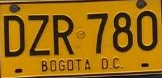

Caracter:  47
Imagen enviada


Inicial (34, 16)
34
16


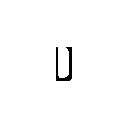

Final (128, 128, 3)
Indice_Predicho: [14]
Caracter Identificado:  ['D']
Caracter:  56
Imagen enviada


Inicial (32, 15)
32
15


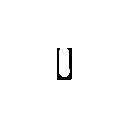

Final (128, 128, 3)
Indice_Predicho: [14]
Caracter Identificado:  ['D']
Caracter:  69
Imagen enviada


Inicial (46, 28)
46
28


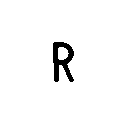

Final (128, 128, 3)
Indice_Predicho: [28]
Caracter Identificado:  ['R']
Caracter:  70
Imagen enviada


Inicial (47, 29)
47
29


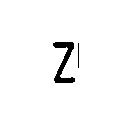

Final (128, 128, 3)
Indice_Predicho: [36]
Caracter Identificado:  ['Z']
Caracter:  72
Imagen enviada


Inicial (47, 28)
47
28


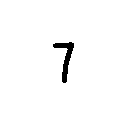

Final (128, 128, 3)
Indice_Predicho: [8]
Caracter Identificado:  ['7']
Caracter:  73
Imagen enviada


Inicial (47, 27)
47
27


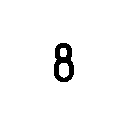

Final (128, 128, 3)
Indice_Predicho: [9]
Caracter Identificado:  ['8']
Caracter:  75
Imagen enviada


Inicial (56, 29)
56
29


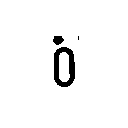

Final (128, 128, 3)
Indice_Predicho: [1]
Caracter Identificado:  ['0']


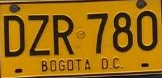

In [156]:
dimensions = (162,78)
#images_ = np.array(file2)
print('dimensiones_:',file2.shape)
image = cv2.resize(file2,dimensions)

cnts = []
cv2_imshow(image)
#cv2_imshow(image)
gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray2 = cv2.blur(gray1,(3,3))
canny1 = cv2.Canny(gray2,150,200)
canny2 = cv2.dilate(canny1,None,iterations=1)
#_,cnts,_ = cv2.findContours(canny,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
#cnts,_ = cv2.findContours(canny,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
#cnts = cv2.findContours(canny2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
im2,cnts,hierarchy = cv2.findContours(canny2, 1, 2)  #No era del código original
#cv2.drawContours(image,cnts,-1,(0,255,0),2)
i=1
#%cd /content/drive/MyDrive/Procesamiento_D_Imagenes
#for c in cnts:
for i in range(len(cnts)):
  #cnts.pop(c)
  placa = []
  area = cv2.contourArea(cnts[i])
  
  x,y,w,h = cv2.boundingRect(cnts[i])
  epsilon = 0.09*cv2.arcLength(cnts[i],True)
  approx = cv2.approxPolyDP(cnts[i],epsilon,True)   #approximate the shape of polygonal curves

  if area>151 and area<1000:   #551-4900      #251-4900  #251-1000
    
    #print("approx:",len(approx))
    #cv2.drawContours(image,[approx],0,(0,255,0),3)
    aspect_ratio = float(w)/h
    #print('aspect_ratio=',aspect_ratio)
    #print("aspect_ratio:",aspect_ratio)
    if aspect_ratio>0.1 and aspect_ratio<2.6:  #original: 2.4 ; >0.1 <10 <2.6
      placa = gray2[y:y+h+4,x-2:x+w+3]
      text = ""  #No pertenece al código original
      print('Caracter: ',i)
      if placa is None:
        continue
      print('Imagen enviada')
      cv2_imshow(placa)
      text = ocr(placa,2)
      print('Caracter Identificado: ',text)
      
cv2_imshow(image)
